# Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading our data set
data = pd.read_csv("/content/bank_data.csv")
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [4]:
# Examin shape of data
data.shape


(1882, 6)

In [41]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_group
0,2030,194,263.540,Level 0 Recovery,19,Male,10-20
1,1150,486,416.090,Level 0 Recovery,25,Female,20-30
2,380,527,429.350,Level 0 Recovery,27,Male,20-30
3,1838,536,296.990,Level 0 Recovery,25,Male,20-30
4,1995,541,346.385,Level 0 Recovery,34,Male,30-40


**Checking random data**

In [42]:
data.sample(3)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_group
1179,900,2749,2583.971778,Level 2 Recovery,31,Female,30-40
145,1556,882,346.510000,Level 0 Recovery,25,Male,20-30
1396,753,3516,4742.274103,Level 3 Recovery,60,Male,50-60


In [6]:
data.value_counts()

id    expected_recovery_amount  actual_recovery_amount  recovery_strategy  age  sex   
6     8974                      16456.835330            Level 4 Recovery   65   Female    1
1374  5600                      9432.854057             Level 4 Recovery   74   Male      1
1388  3111                      5849.191910             Level 3 Recovery   37   Male      1
1387  1550                      1288.352616             Level 1 Recovery   19   Female    1
1386  988                       462.700000              Level 0 Recovery   26   Male      1
                                                                                         ..
695   1589                      1119.463699             Level 1 Recovery   27   Male      1
694   2347                      2052.488423             Level 2 Recovery   59   Male      1
693   9753                      20018.690730            Level 4 Recovery   54   Male      1
692   1563                      937.019059              Level 1 Recovery   34   Male 

Checking missing values or null values

In [7]:
# checking null values and data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [8]:
#checking how many columns are there
data.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [9]:
# cleaning the data
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

Here, after examin the data there is no null values and no unnecessary data or column in data set, so we do not need to drop any column or fixing null values.

In [10]:
# cheecking amount of rows in given data set to understand the size we are working with
len(data)

1882

In [11]:
# Performing statistical analysis
# we performing describe function on the numerical columns
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [12]:
# Using describe function on the categorical variable
data.describe(include = 'object')

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


In [13]:
# Checking duplicate values
data.duplicated().sum()

0

So, there is no duplicated values in data set

In [14]:
# checking how many unique values are there by each columns
data.nunique()

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [15]:
data['recovery_strategy'].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

Sex Count

In [16]:
# sex count
sd = data['sex'].value_counts()
sd = sd.reset_index().rename(columns = {'index' : 'sex', 'sex' : 'count'})
sd

,sex,count
0,Male,973
1,Female,909


In [17]:
# recovery_strategy	count

rec_d = data['recovery_strategy'].value_counts()
rec_d = rec_d.reset_index().rename(columns = {'index' : 'recovery_strategy','recovery_strategy' :'count' })
rec_d

,recovery_strategy,count
0,Level 1 Recovery,670
1,Level 3 Recovery,368
2,Level 2 Recovery,333
3,Level 4 Recovery,264
4,Level 0 Recovery,247


Checking Outliers

In [18]:
# Create 25th and 75th percentile

q1,q3 = np.percentile(data['actual_recovery_amount'],[25,75])
q1,q3

(1045.1903002499998, 5417.23720675)

In [19]:
# Create Interquartile Range
iqr = q3 - q1
iqr

4372.0469065

*Minimum quartile range and Maximum quartile range*

In [20]:
#create Maximum and Minimum value
min_qr = q1-1.5*iqr
max_qr = q3+1.5*iqr
min_qr,max_qr




(-5512.880059499999, 11975.3075665)

# ***Exploratory Data Analysis***

*create age group*

In [21]:
#Creating age group wise
def age_group(age):
  if (age <= 10):
    return '0-10'
  elif (age <=20):
    return '10-20'
  elif (age <= 30):
    return '20-30'
  elif (age <=40):
    return '30-40'
  elif (age <=50):
    return '40-50'
  elif (age<= 60):
    return '50-60'
  elif (age<=70):
    return '60-70'
  elif (age <=80):
    return '70-80'
  else:
    return '80-above'

In [22]:
data['age_group'] = data['age'].apply(age_group)
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,age_group
0,2030,194,263.540000,Level 0 Recovery,19,Male,10-20
1,1150,486,416.090000,Level 0 Recovery,25,Female,20-30
2,380,527,429.350000,Level 0 Recovery,27,Male,20-30
3,1838,536,296.990000,Level 0 Recovery,25,Male,20-30
4,1995,541,346.385000,Level 0 Recovery,34,Male,30-40
...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female,60-70
1878,196,9857,9709.909257,Level 4 Recovery,68,Female,60-70
1879,313,9859,30209.181790,Level 4 Recovery,58,Female,50-60
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female,60-70


Age Group Count

In [23]:
age_vc = data['age_group'].value_counts()
age_vc = age_vc.reset_index().rename(columns = {'index':'age_group','age_group':'count'})
age_vc

,age_group,count
0,30-40,523
1,20-30,520
2,40-50,276
3,50-60,226
4,60-70,133
5,10-20,108
6,70-80,75
7,80-above,21


**Age Group wise expected_recovery_amount**

In [27]:
age_vc=data.groupby('age_group').agg(
total_expected_recovery_amount=('expected_recovery_amount','sum'))
age_vc=age_vc.reset_index().sort_values(by='total_expected_recovery_amount')
age_vc

,age_group,total_expected_recovery_amount
0,10-20,142624
7,80-above,144709
6,70-80,443858
1,20-30,736623
5,60-70,759699
3,40-50,850510
2,30-40,979609
4,50-60,1136627


**Age wise Expected recovery amount**

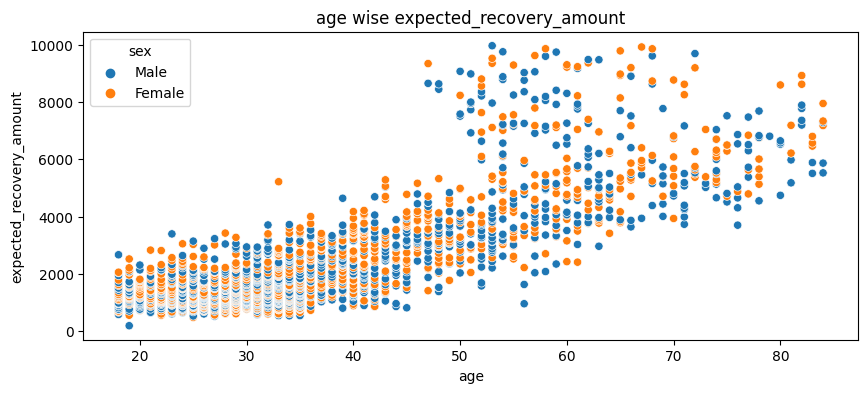

In [40]:
plt.figure(figsize = (10,4))
sns.scatterplot(data= data,x='age', y = 'expected_recovery_amount', hue = 'sex')
plt.title('age wise expected_recovery_amount')
plt.show()


**Actual Recovery amount vs Expected recovery amount**

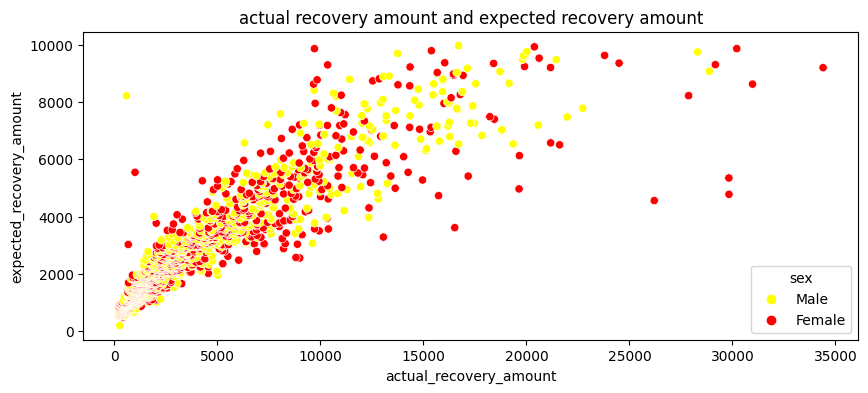

In [43]:
plt.figure(figsize = (10,4))
sns.scatterplot(data= data,x='actual_recovery_amount', y = 'expected_recovery_amount',
                palette = ['yellow','red'],hue ='sex')
plt.title('actual recovery amount and expected recovery amount')
plt.show()

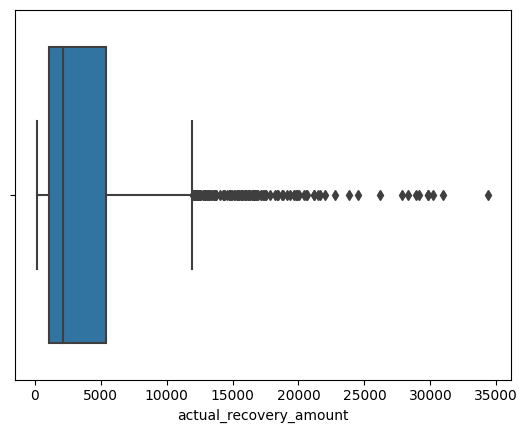

In [37]:
sns.boxplot(x=data["actual_recovery_amount"])
plt.show()

Sex count using  by Pie chart

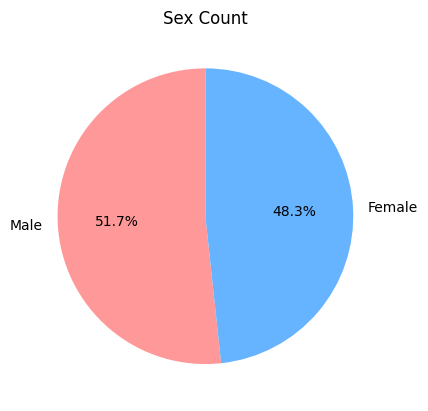

In [36]:
plt.pie(sd['count'],labels=sd['sex'],autopct='%1.1f%%',
        startangle=90,colors = ['#ff9999', '#66b3ff'])
plt.title('Sex Count')
plt.show()

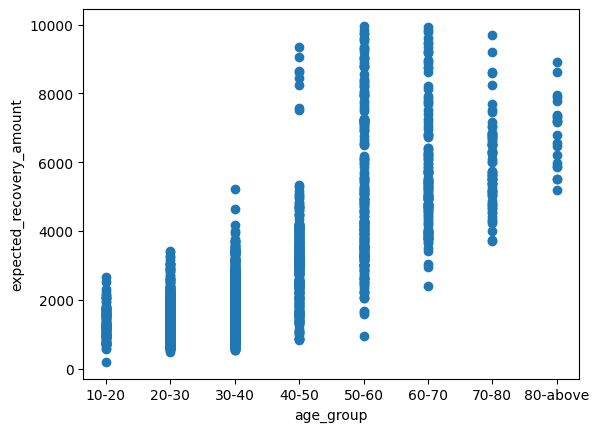

In [35]:
plt.scatter(data['age_group'],data['expected_recovery_amount'])
plt.xlabel('age_group')
plt.ylabel('expected_recovery_amount')
plt.show()



**Recovery Strateg Count using by Line Plot**

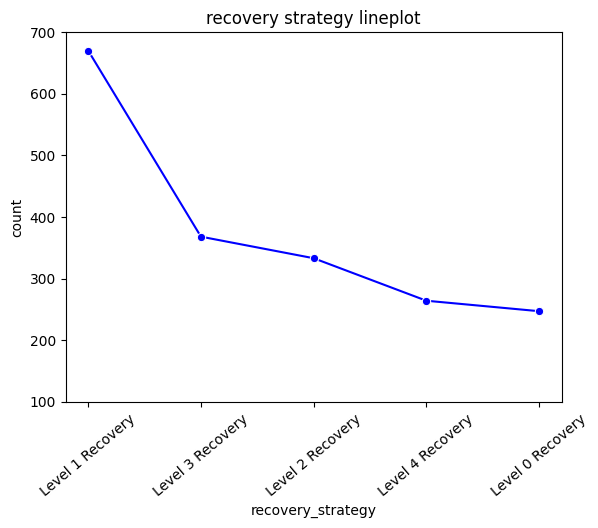

In [34]:
sns.lineplot(data=rec_d,x='recovery_strategy',y='count',marker = 'o',color='blue')
plt.yticks(np.arange(100,800,100))
plt.xticks(rotation=40)
plt.title('recovery strategy lineplot')
plt.show()